In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from datetime import datetime
import pytz

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32273.7676 - val_loss: 31896.6191
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31688.5215 - val_loss: 30809.9375
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30527.1055 - val_loss: 29036.2461
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28497.4727 - val_loss: 26286.2793
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25303.9609 - val_loss: 22513.7598
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21168.0957 - val_loss: 17850.0117
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16431.7930 - val_loss: 12587.3242
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11196.9180 - val_loss: 7524.5820
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6266.6030 - val_loss: 3107.0835
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2214.1587 - val_loss: 763.8161
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 478.7547 - val_loss: 543.4729
Epoch 1

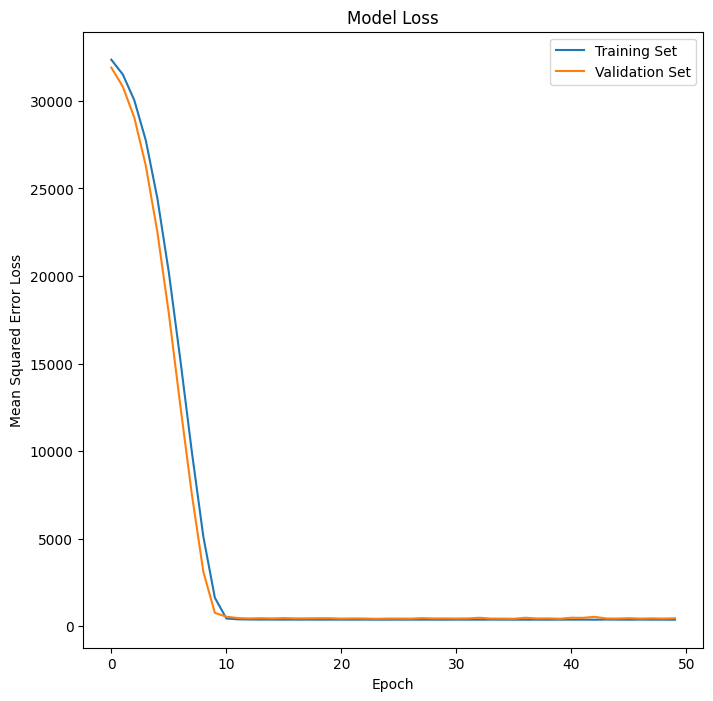

In [3]:
# DNN-30-8 Model without optimizer
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(8))  # Second hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16344.3164 - val_loss: 5279.7251
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4696.3584 - val_loss: 5032.4121
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3809.4277 - val_loss: 7643.7271
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5432.5728 - val_loss: 2731.6831
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4483.9688 - val_loss: 3805.2722
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3756.0740 - val_loss: 3011.7256
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3843.3572 - val_loss: 5488.0908
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3757.3176 - val_loss: 3487.7402
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3766.6216 - val_loss: 3329.6768
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3760.0151 - val_loss: 5798.6416
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3104.0310 - val_loss: 3090.8655
Epoch 1

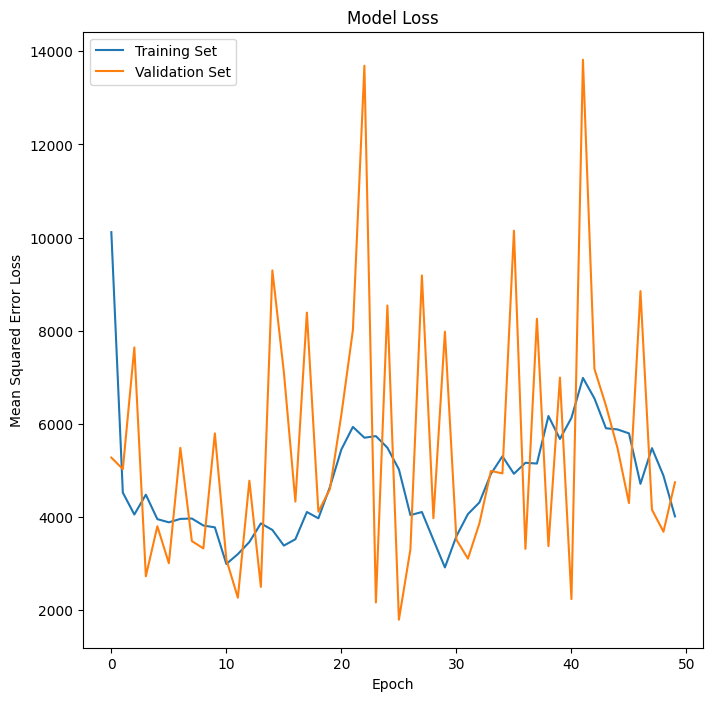

In [2]:
# DNN-30-8 Model with SGD optimizer and LR of 0.1
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(8))  # Second hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.1, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 16283.9102 - val_loss: 698.7582
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 522.7199 - val_loss: 705.1218
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 566.4940 - val_loss: 654.6700
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 602.7153 - val_loss: 580.1538
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 486.7009 - val_loss: 880.1979
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 517.8801 - val_loss: 635.0709
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 630.9324 - val_loss: 611.3441
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 572.9855 - val_loss: 1361.0244
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 630.2646 - val_loss: 482.0982
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 544.6418 - val_loss: 663.6277
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 514.0064 - val_loss: 679.5267
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━

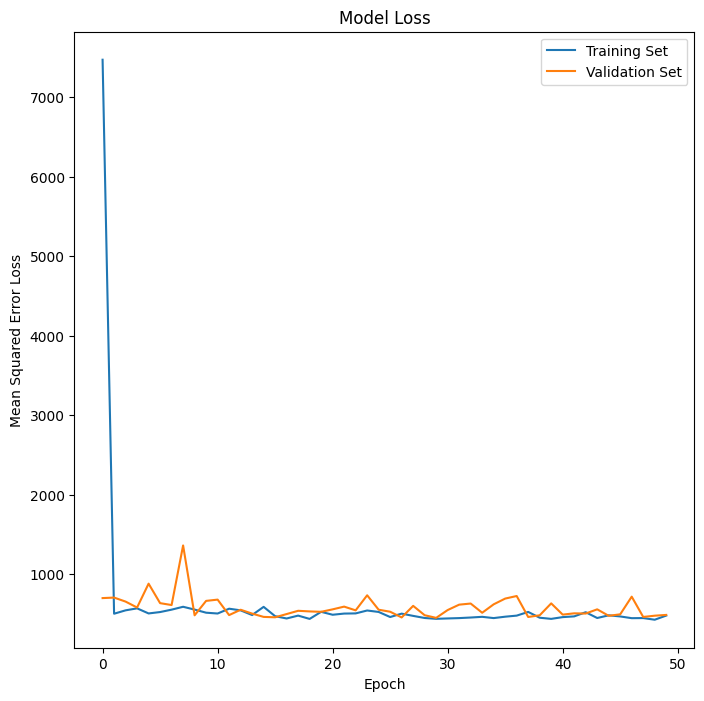

In [5]:
# DNN-30-8 Model with Adam optimizer and LR of 0.1
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(8))  # Second hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.1))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28671.5273 - val_loss: 3008.7507
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1805.6027 - val_loss: 1562.7991
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 682.4760 - val_loss: 723.8211
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 607.6820 - val_loss: 809.2297
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 587.4453 - val_loss: 753.7950
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 567.3649 - val_loss: 722.1115
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 527.5555 - val_loss: 714.7141
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 531.0870 - val_loss: 917.8116
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 508.0190 - val_loss: 686.4552
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 507.0634 - val_loss: 577.0952
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 455.2791 - val_loss: 718.7345
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━

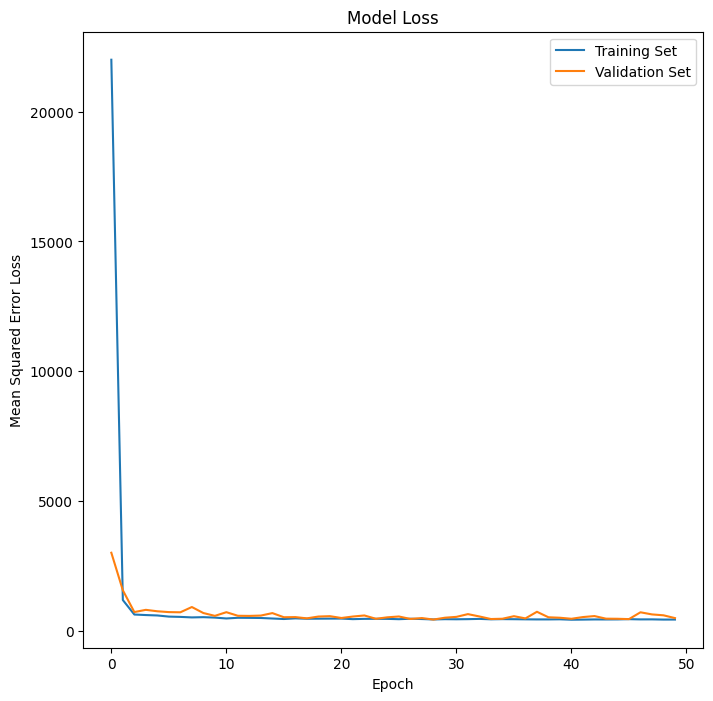

In [3]:
# DNN-30-8 Model with SGD optimizer and LR of 0.01
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(8))  # Second hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 28795.9766 - val_loss: 933.6472
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 720.8011 - val_loss: 470.0811
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 426.8177 - val_loss: 485.6603
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 470.8695 - val_loss: 568.9644
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 538.0568 - val_loss: 497.9846
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 433.0801 - val_loss: 552.0355
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 420.6114 - val_loss: 529.6431
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 457.5083 - val_loss: 544.2096
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 441.0683 - val_loss: 471.1758
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 462.1063 - val_loss: 451.5305
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 424.4537 - val_loss: 422.4381
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 

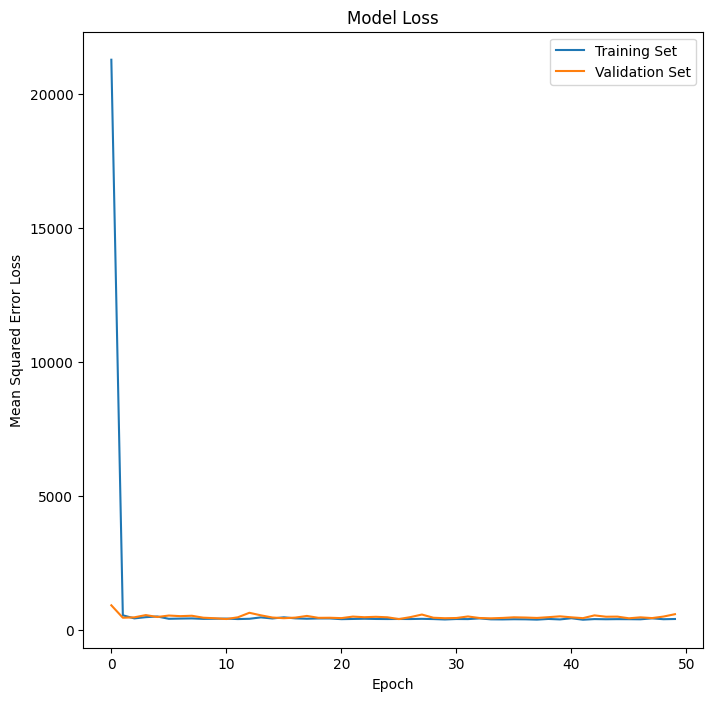

In [6]:
# DNN-30-8 Model with Adam optimizer and LR of 0.01
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(8))  # Second hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32805.0586 - val_loss: 32051.2617
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32442.0742 - val_loss: 31225.5898
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31223.7207 - val_loss: 29786.0918
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29543.1523 - val_loss: 27563.5547
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27207.7129 - val_loss: 24391.5781
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23885.3164 - val_loss: 20239.5977
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19882.1230 - val_loss: 15357.8506
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15203.5938 - val_loss: 10292.6816
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11302.0938 - val_loss: 5631.8579
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7781.4917 - val_loss: 2270.4019
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4276.2920 - val_loss: 725.5511
Epo

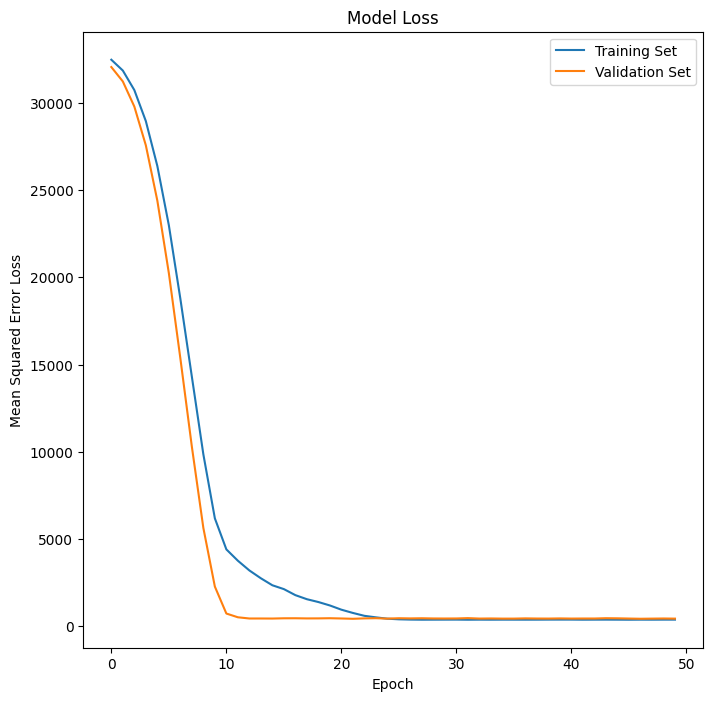

In [4]:
# DNN-30-8 Model with SGD optimizer and LR of 0.001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(8))  # Second hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.001, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32601.3691 - val_loss: 32023.3613
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32181.6270 - val_loss: 30926.0293
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30252.6543 - val_loss: 28289.5605
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27389.6113 - val_loss: 22739.9746
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20815.6328 - val_loss: 14406.3037
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12196.0195 - val_loss: 6261.1313
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4753.7715 - val_loss: 1765.6289
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1292.8611 - val_loss: 586.2877
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 462.0687 - val_loss: 462.2067
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 380.4859 - val_loss: 434.6449
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 359.9205 - val_loss: 437.2477
Epoch 12/50
77/

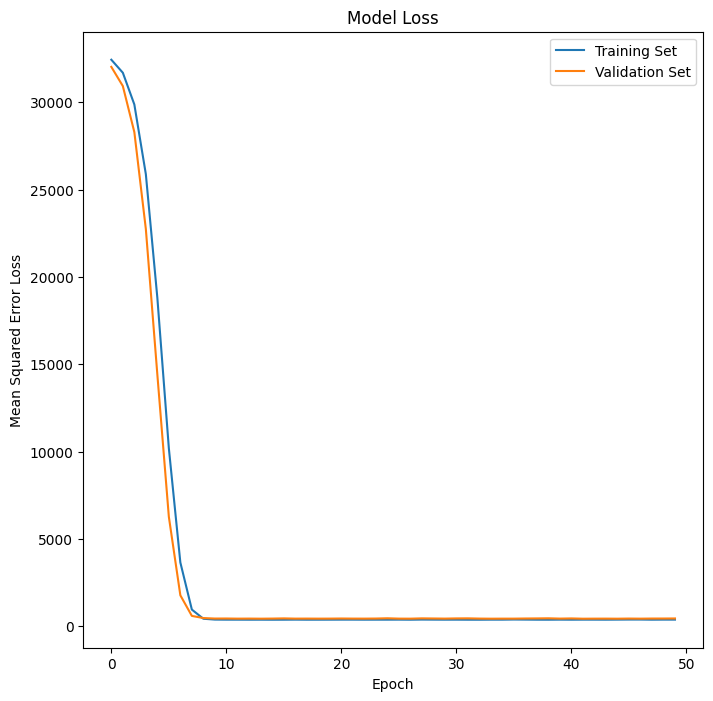

In [7]:
# DNN-30-8 Model with Adam optimizer and LR of 0.001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(8))  # Second hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32643.2598 - val_loss: 32537.3730
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32596.1211 - val_loss: 32513.3828
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32668.5215 - val_loss: 32489.1641
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32590.2012 - val_loss: 32465.0586
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32682.7539 - val_loss: 32440.0918
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32686.4062 - val_loss: 32413.7285
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32334.3086 - val_loss: 32386.4297
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32545.3711 - val_loss: 32357.1055
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32396.3359 - val_loss: 32325.6855
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32307.7207 - val_loss: 32291.6230
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32347.0664 - val_loss: 32254.19

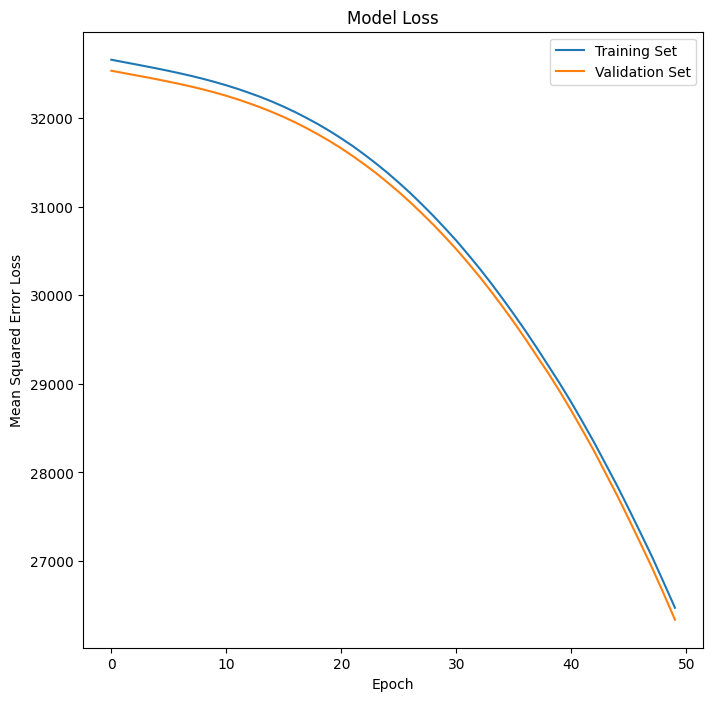

In [5]:
# DNN-30-8 Model with SGD optimizer and LR of 0.0001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(8))  # Second hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.0001, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32831.2148 - val_loss: 32542.2129
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32845.0664 - val_loss: 32500.1797
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32859.1953 - val_loss: 32457.4453
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32534.1074 - val_loss: 32414.7051
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32633.4219 - val_loss: 32368.7969
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32543.6680 - val_loss: 32320.6621
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32269.9551 - val_loss: 32267.8750
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32423.0684 - val_loss: 32210.2031
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32262.0234 - val_loss: 32145.9844
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32079.3828 - val_loss: 32076.3770
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32324.4316 - val_loss: 31998.68

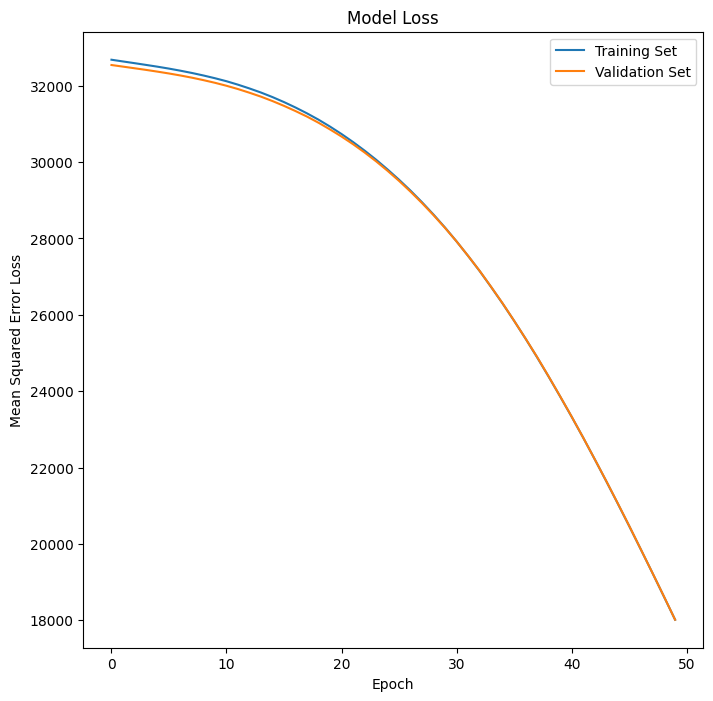

In [8]:
# DNN-30-8 Model with Adam optimizer and LR of 0.0001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(8))  # Second hidden layer with 8 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()